In [23]:
import tensorflow as tf
# from tensorflow import keras
import matplotlib.pyplot as plt
import os
import PIL
import numpy as np
import time 
from datetime import datetime
from packaging import version
# %load_ext tensorboard
# import tensorboard

# Functions

In [20]:
def holdout_set(model):
    """
    Testing a model against the holdout set by comparing predicted and actual values 
    """
    total = 0 
    correct = 0 
    test_dir = "D:/card_data/cv_num_cards_deck/test_images/"
    predics = []
    for card in os.listdir(test_dir):
        card_path = os.path.join(test_dir, card)
        images = os.listdir(card_path)
        for image in images:
            total += 1
            image_path = os.path.join(card_path, image)
            predict = image_prediction(image_path, model, class_names)
            if card == predict:
                correct += 1

            
            predics.append((card, predict))
    print(predics)
    print(f"overall accuracy is {round((correct/total)*100, 2)}%. So {correct} correct out of {total}")

In [18]:
def image_prediction(image_path, model, class_names, img_width=224, img_height=224):
    """
    Predicting the class of a given image 
    """
    image_array = image_prepro(image_path)
    predictions = model.predict(image_array)
    
    # Since the model's final layer uses a softmax activation, predictions are already in probability form
    predicted_class = np.argmax(predictions[0])  # Get the index of the highest probability class
    probability = predictions[0][predicted_class]  # Get the probability of the predicted class
    
    print(f"Predicted class: {predicted_class}, Probability: {probability}, Class: {class_names[predicted_class]}")
    return class_names[predicted_class]

In [17]:
def image_prepro(path):
    """
    Preprocessing an image for use in the CNN 
    """
    image = PIL.Image.open(path).resize((img_width, img_height)).convert('RGB')
    image_array = np.array(image) / 255  # Scale pixel values to -1 to 1
    image_array = np.expand_dims(image_array, axis=0)  # Add a batch dimension
    return image_array

## Load Model and Training Data 

In [4]:
local_data_dir = 'D:/card_data/cv_num_cards_deck/52kards'
img_height = 224
img_width = 224
img_size = (224, 224)
batch_size = 32
# Create the training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    local_data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width), # specified the resizing 
    batch_size=batch_size) 

Found 12304 files belonging to 52 classes.
Using 9844 files for training.


In [5]:
# Create the validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    local_data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 12304 files belonging to 52 classes.
Using 2460 files for validation.


In [6]:
class_names = train_ds.class_names

In [7]:
normalization_layer = tf.keras.layers.Rescaling(1./255) # 1./127.5, offset=-1
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [8]:
MODEL_PATH = 'models/model_to_use'
model = tf.keras.models.load_model(MODEL_PATH)

In [ ]:
model.summary()

## Tensorboard

In [9]:
# # Define the Keras TensorBoard callback.
# logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# # Train the model.
# model.fit(
#     train_ds,
#     batch_size=batch_size,
#     epochs=2,
#     validation_data=val_ds,
#     callbacks=[tensorboard_callback])

In [10]:
# %tensorboard --logdir logs

# Graphing an individual Filter 

In [19]:
holdout_set(model)

1/1 [==============================] - 0s 16ms/step
Predicted class: 0, Probability: 1.0, Class: 10c
1/1 [==============================] - 0s 17ms/step
Predicted class: 1, Probability: 0.999775230884552, Class: 10d
1/1 [==============================] - 0s 16ms/step
Predicted class: 4, Probability: 0.9884916543960571, Class: 2c
1/1 [==============================] - 0s 16ms/step
Predicted class: 4, Probability: 0.9999992847442627, Class: 2c
1/1 [==============================] - 0s 16ms/step
Predicted class: 7, Probability: 1.0, Class: 2s
1/1 [==============================] - 0s 17ms/step
Predicted class: 10, Probability: 0.9999308586120605, Class: 3h
1/1 [==============================] - 0s 17ms/step
Predicted class: 11, Probability: 1.0, Class: 3s
1/1 [==============================] - 0s 17ms/step
Predicted class: 12, Probability: 1.0, Class: 4c
1/1 [==============================] - 0s 16ms/step
Predicted class: 15, Probability: 0.9998482465744019, Class: 4s
1/1 [===============

In [122]:
test_image_path = "D:/card_data/cv_num_cards_deck/test_images/Kc/IMG_1611.JPG"
test_image = image_prepro(test_image_path)
selected_layers = [
    model.layers[0].output,  # First Conv2D layer output
    model.layers[1].output,  # First MaxPooling2D layer output
    model.layers[2].output,  # Second Conv2D layer output
    model.layers[3].output,  # Second Maxpooling2D layer output
    model.layers[4].output,  # Third Conv2D layer output
    model.layers[5].output,  # Maxpooling2d layer output 
    model.layers[6].output,  # Fourth Conv2D layer 
    model.layers[7].output   # maxpooling2d layer 
]

model_intermediate = tf.keras.models.Model(inputs=model.input, outputs=selected_layers)
feature_maps = model_intermediate.predict(test_image)

1/1 [==============================] - 0s 59ms/step


In [123]:
# Assuming `feature_maps` is obtained from model_intermediate.predict(test_image)
n_layers = len(feature_maps)

# Choose a specific filter to follow; starting with the first filter as an example
filter_index = 

# Set the number of rows and columns for subplot visualization
n_rows = 1
n_cols = n_layers

# Create a figure to visualize the feature maps
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*3))

# If there's only one layer to visualize, ensure `axes` is iterable
if n_layers == 1:
    axes = [axes]

# Loop through each layer's feature map
for col, feature_map in enumerate(feature_maps):
    # Normalize the selected feature map for better visualization
    fm = feature_map[0, :, :, filter_index]  # Assuming a batch size of 1, select the filter_index-th filter
    fm_normalized = (fm - fm.min()) / (fm.max() - fm.min()) if fm.max() > fm.min() else fm

    ax = axes[col]
    ax.imshow(fm_normalized, cmap='magma')
    if (col + 1) % 2 == 1:
        ax.set_title(f'Layer {col+1}: Conv2D Filter {filter_index}')
    else:
        ax.set_title(f'Layer {col+1}: Maxpooling layer')
    ax.axis('off')

plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (3149919228.py, line 5)

In [50]:
feature_map[0, :, :, 0][3]

array([0.        , 0.21287447, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.41400927, 0.8117771 ,
       0.        , 0.        ], dtype=float32)

In [124]:
for x in range(16):
    # Assuming `feature_maps` is obtained from model_intermediate.predict(test_image)
    n_layers = len(feature_maps)
    
    # Choose a specific filter to follow; starting with the first filter as an example
    filter_index = x
    
    for i, feature_map in enumerate(feature_maps):
        # Normalize the selected feature map for better visualization
        fm = feature_map[0, :, :, filter_index]  # Assuming a batch size of 1, select the filter_index-th filter
        fm_normalized = (fm - fm.min()) / (fm.max() - fm.min()) if fm.max() > fm.min() else fm
    
        # Create figure
        fig, ax = plt.subplots()
        ax.imshow(fm_normalized, cmap='magma')
        if (i + 1) % 2 == 1:
            title = f'Layer {i+1}: Conv2D Filter {filter_index}'
        else:
            title = f'Layer {i+1}: Maxpooling layer'
        ax.set_title(title)
        ax.axis('off')
    
        # Save the figure
        fig.savefig(f'filter index_{filter_index} feature_map_{i+1}.png', bbox_inches='tight')
        plt.close(fig)  # Close the figure to free memory

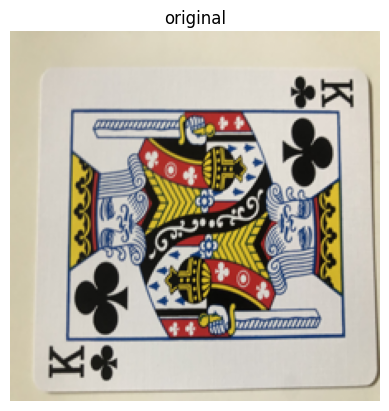

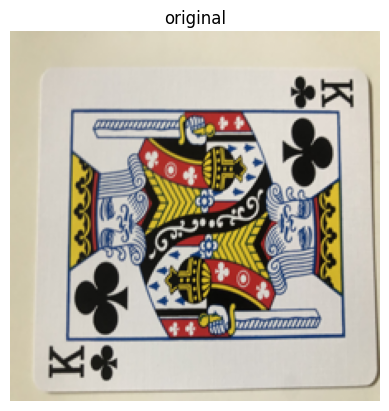

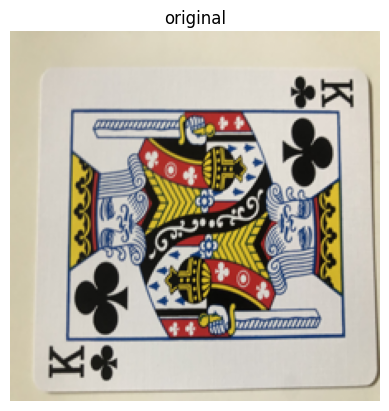

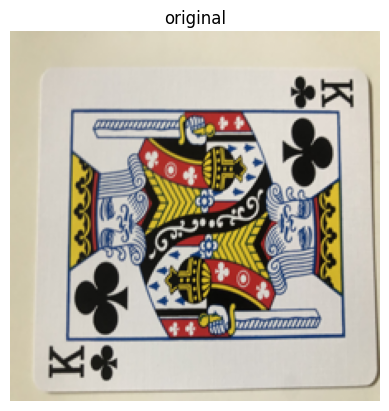

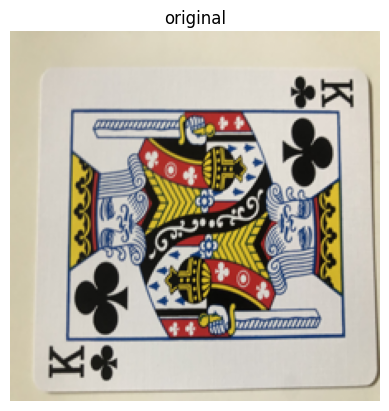

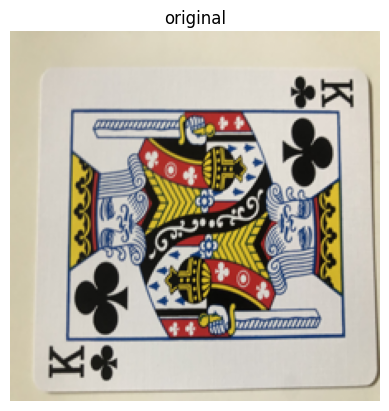

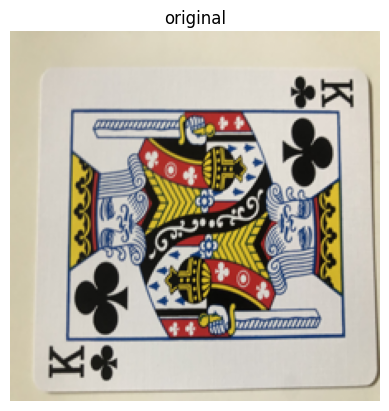

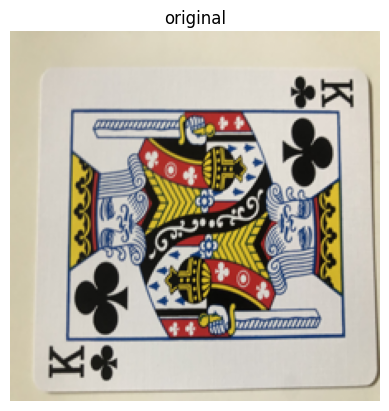

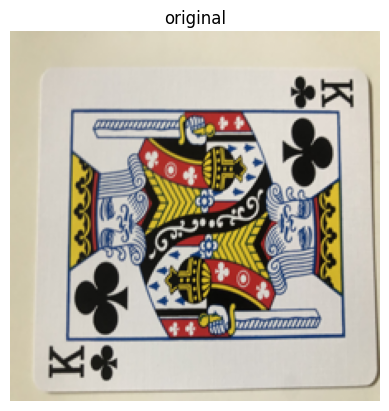

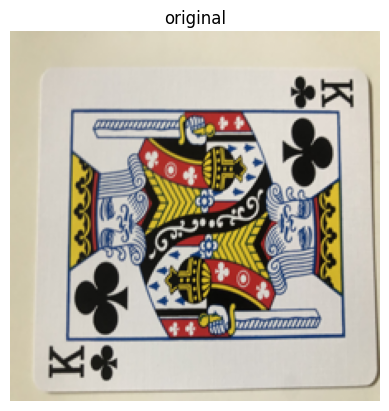

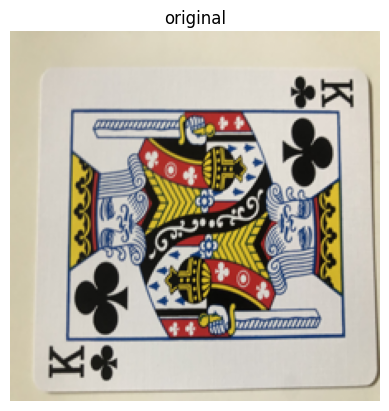

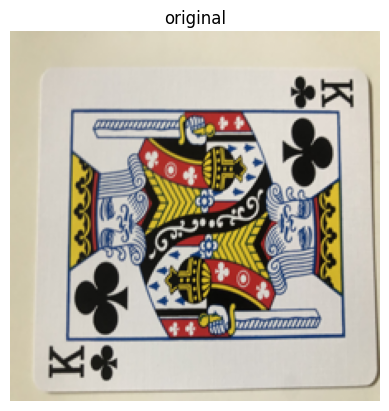

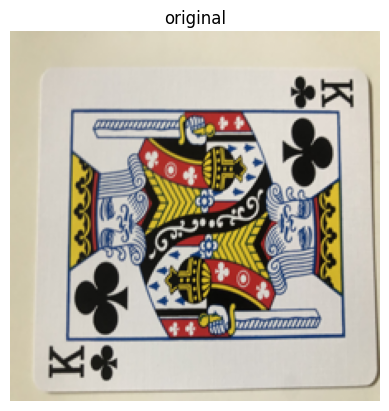

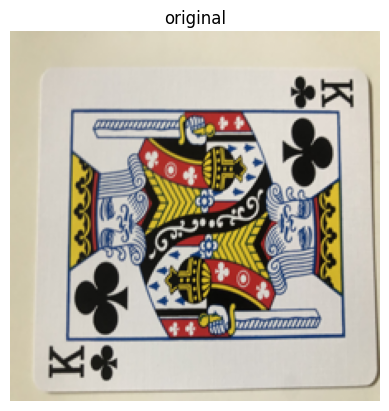

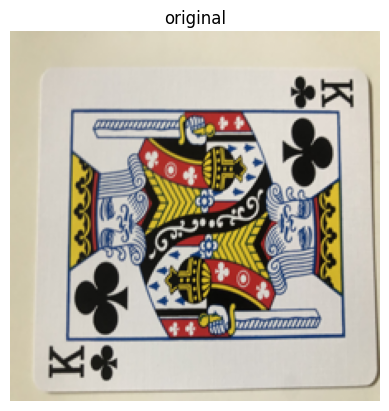

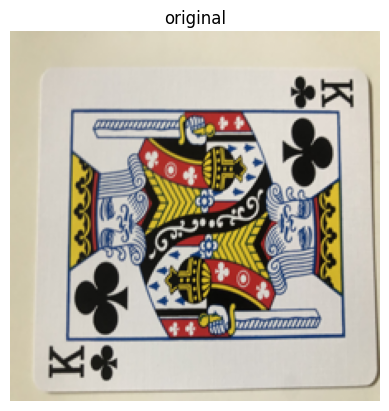

In [125]:
# Select the first image in the batch to remove the batch dimension
image_to_plot = test_image[0, :, :, :]
for i in range(16):
    # Now, image_to_plot has shape (224, 224, 3) and can be plotted
    plt.imshow(image_to_plot)
    plt.axis('off')  # Optional: hides the axis
    plt.title('original')
    plt.savefig(f'filter index_{i} feature_map_{0}.png', bbox_inches='tight')
    plt.show()